## Linear Regression

### Data Preprocessing

#### Data Loading

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings('ignore')

dataset = pd.read_csv('Real Estate.csv')

In [138]:
dataset.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


## Data Cleaning

In [139]:
# removing X1, X2, ..., Y From column name
def clean_name(name):
    if name.startswith('X'):
        return name[3:]
    elif name.startswith('Y'):
        return name[2:]
    else:
        return name

dataset.rename(columns=clean_name, inplace=True)
display(dataset)

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [140]:
# checking for null values
display(dataset[dataset.isnull().any(axis=1)])

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area


In [142]:
# removing the column 'No' as it is the serial no and will not affect the house price.
if 'No' in dataset.columns:
    dataset.drop("No", axis=1, inplace=True) 

display(dataset)

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [143]:
# Date is in decimal format where actual_date = decimal_date * 365 days
def convert_decimal_year_to_date(decimal_year):
    year = int(decimal_year)
    
    if (((year % 4 == 0) & (year % 100 != 0)) | (year % 400 == 0)):
        day_of_year = int((decimal_year - year) * 366)
    else:
        day_of_year = int((decimal_year - year) * 365.2425)
    return datetime(year, 1, 1) + pd.Timedelta(days=day_of_year - 1)

dataset['transaction date'] = dataset['transaction date'].apply(convert_decimal_year_to_date)
print(dataset.columns)

Index(['transaction date', 'house age', 'distance to the nearest MRT station',
       'number of convenience stores', 'latitude', 'longitude',
       'house price of unit area'],
      dtype='object')


## Features Selection

In [114]:
# Identify the target variable
target_variable = "house price of unit area"

# Select relevant features for analysis
selected_features = ['house age', 'distance to the nearest MRT station', 'number of convenience stores', 'latitude', 'longitude']

In [115]:
# Scale numerical features
scaler = StandardScaler()
dataset[selected_features] = scaler.fit_transform(dataset[selected_features])

## Data Transformation

In [144]:
# extracting year, month and day from date.
if 'transaction date' in dataset.columns and pd.api.types.is_datetime64_any_dtype(dataset['transaction date']):
    dataset['year'] = dataset['transaction date'].dt.year
    dataset['month'] = dataset['transaction date'].dt.month
    dataset['day'] = dataset['transaction date'].dt.day
    
    # Drop 'transaction date' column
    dataset.drop('transaction date', axis=1, inplace=True)
    dataset['day'].unique()

else:
    print("Error: 'transaction date' column not found or not in datetime format.")

display(dataset)

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area,year,month,day
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012,11,30
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012,11,30
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013,7,31
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013,7,1
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012,10,30
...,...,...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4,2012,12,31
410,5.6,90.45606,9,24.97433,121.54310,50.0,2012,8,31
411,18.8,390.96960,7,24.97923,121.53986,40.6,2013,4,1
412,8.1,104.81010,5,24.96674,121.54067,52.5,2012,12,31


## Exploratory Data Analysis

Index(['house age', 'distance to the nearest MRT station',
       'number of convenience stores', 'latitude', 'longitude',
       'house price of unit area', 'year', 'month', 'day'],
      dtype='object')


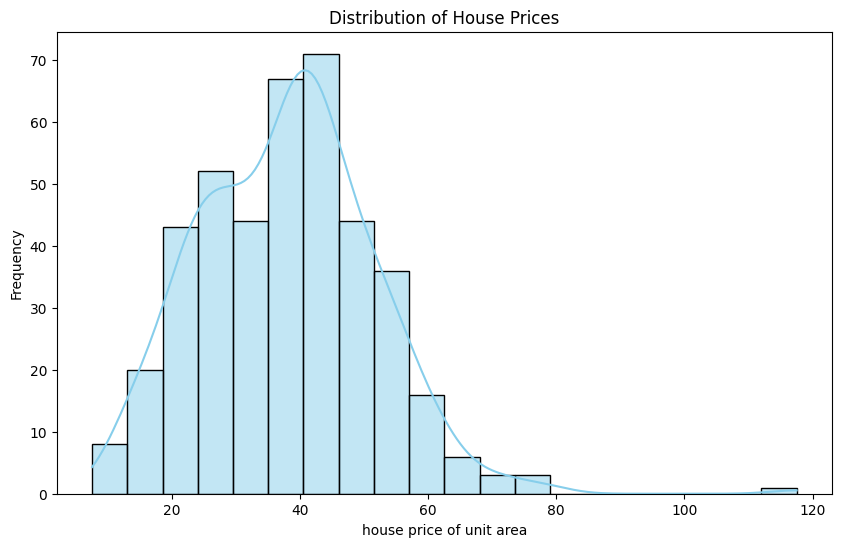

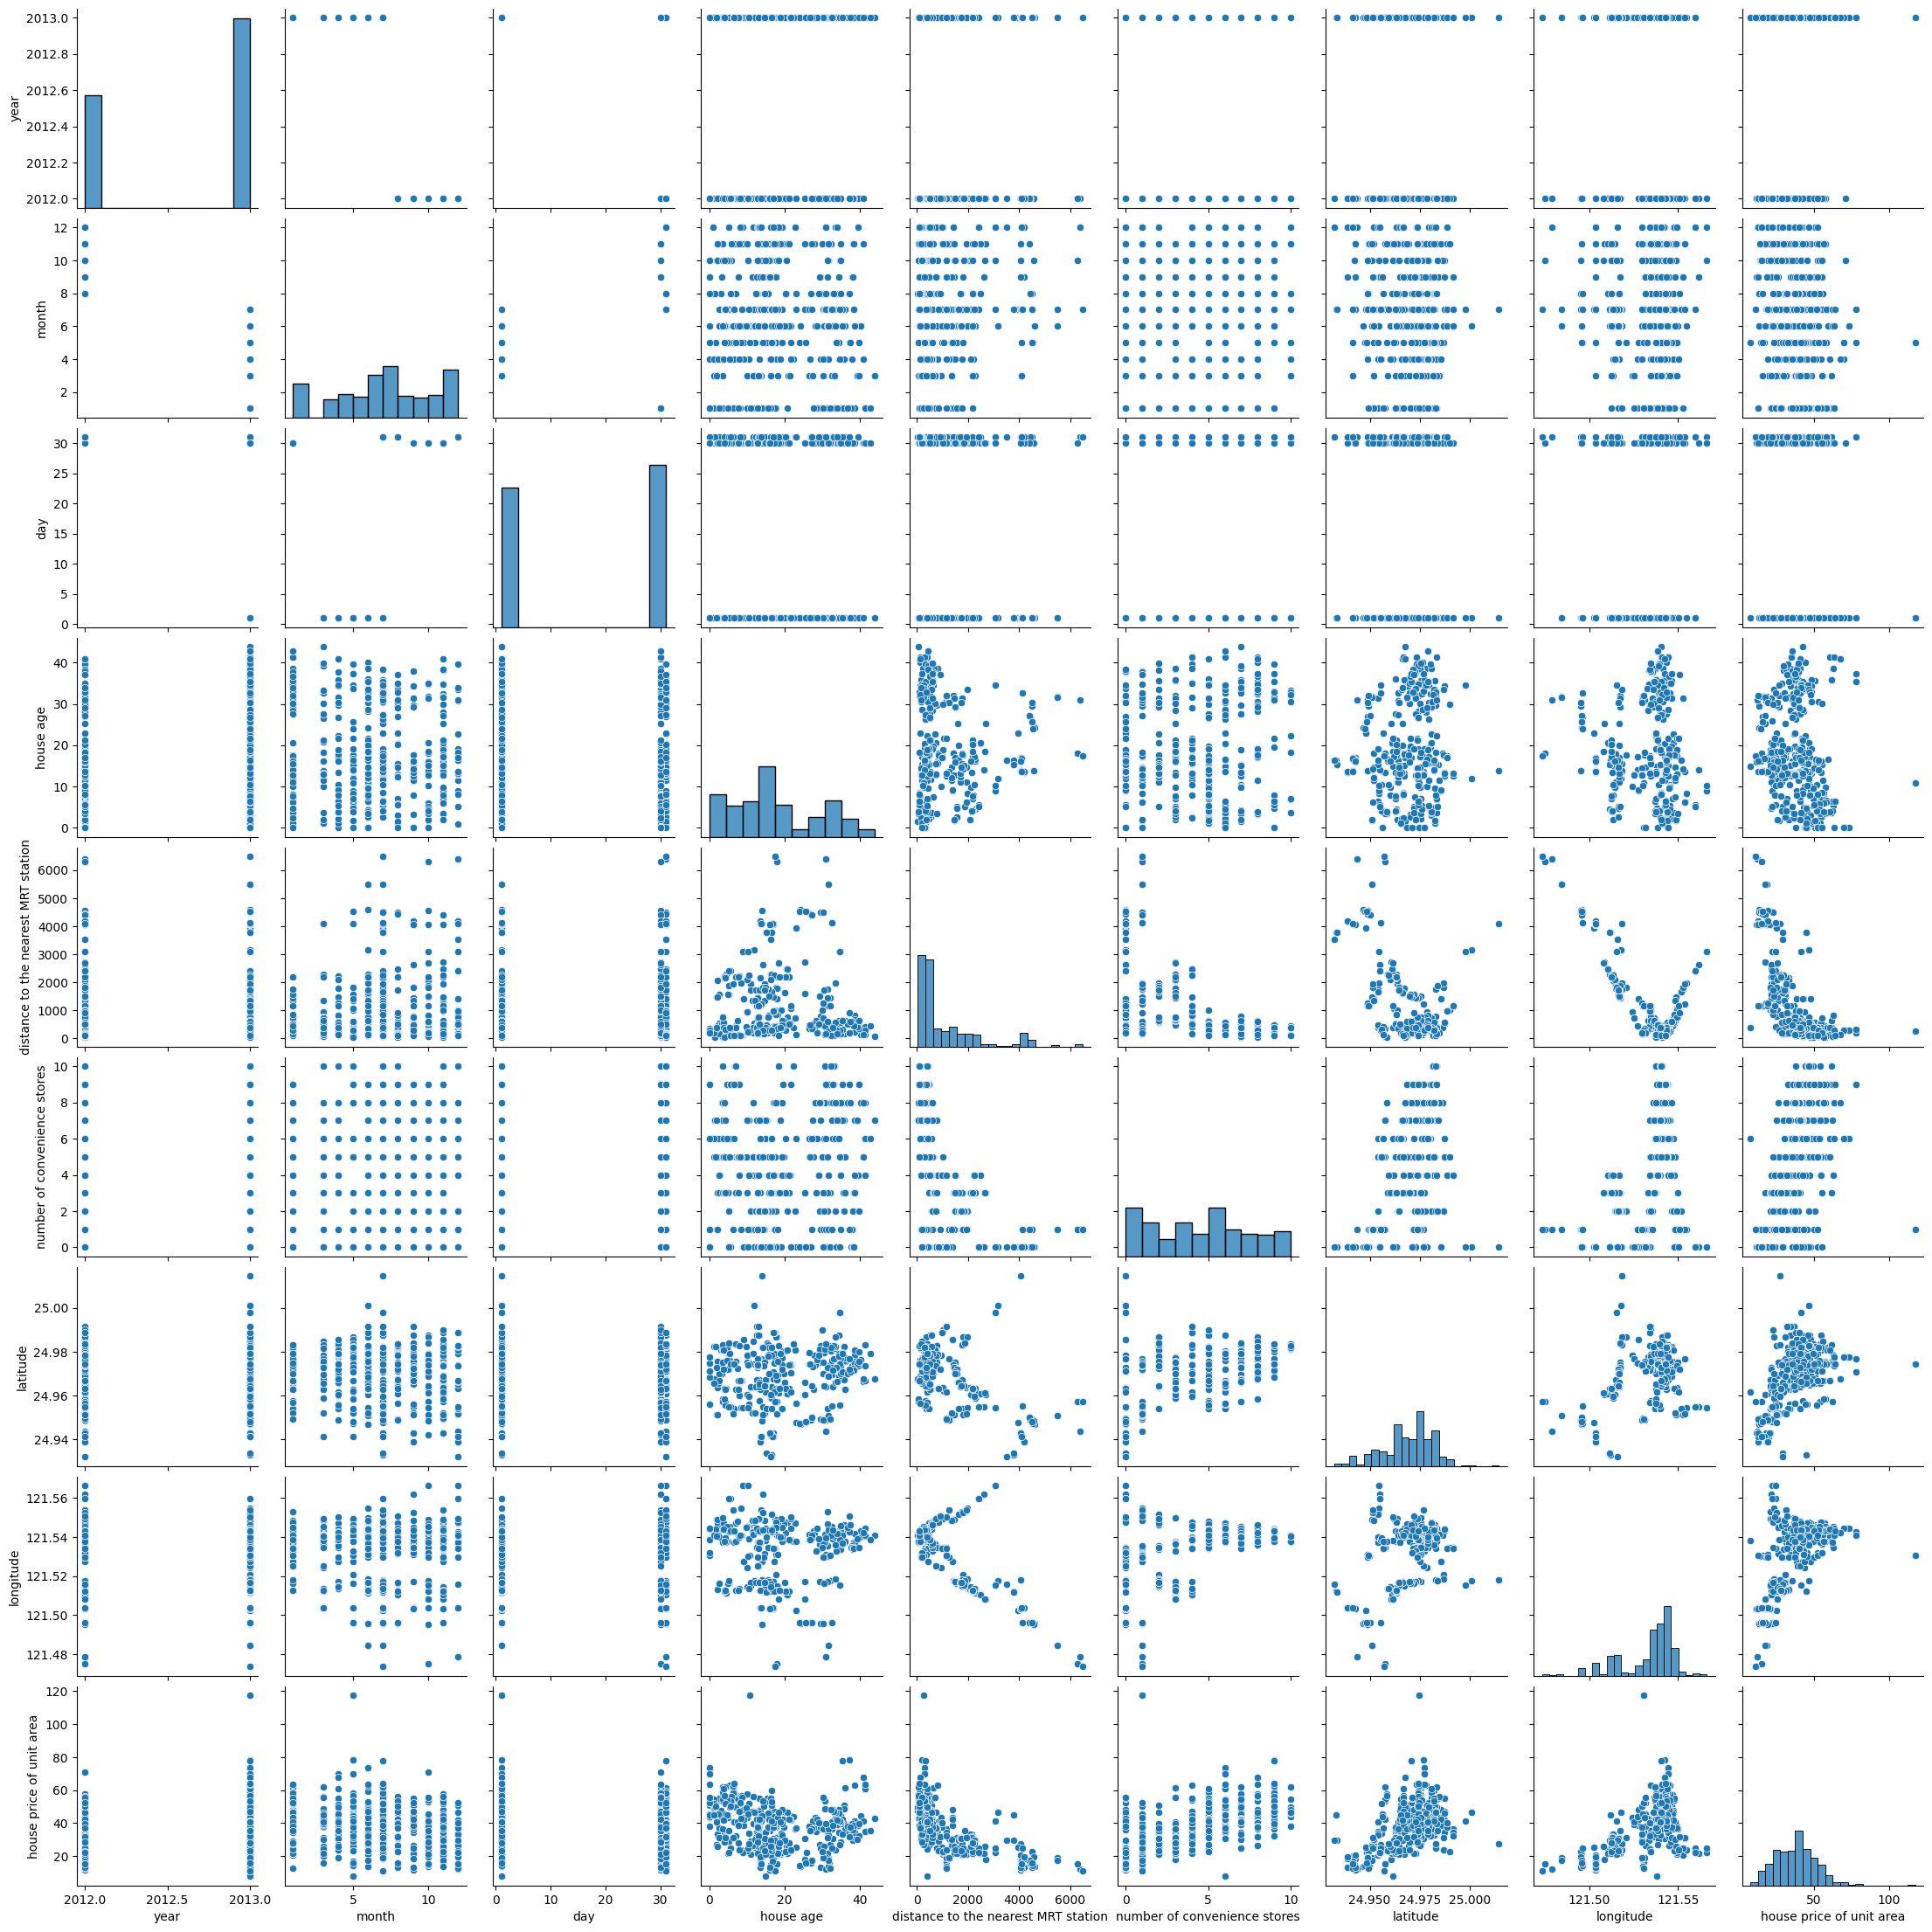

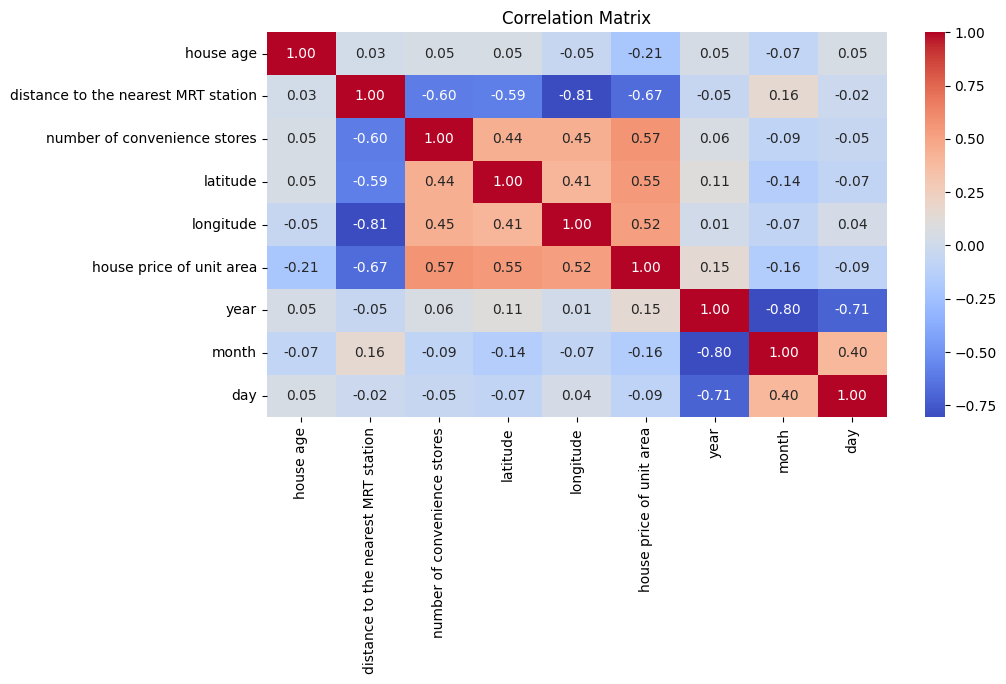

In [145]:
# Check the column names in the dataset
print(dataset.columns)

# Visualizing the Distribution of House Prices
plt.figure(figsize=(10, 6))
sns.histplot(dataset[ 'house price of unit area'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of House Prices')
plt.xlabel('house price of unit area')
plt.ylabel('Frequency')
plt.show()

# Exploring Relationships Between Variables
sns.pairplot(dataset[['year', 'month', 'day', 'house age', 'distance to the nearest MRT station', 'number of convenience stores', 'latitude', 'longitude','house price of unit area']])
plt.show()

# Correlation Matrix
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Getting the inputs and output

In [146]:
# Select all rows and all columns except the last one from the dataset DataFrame and assigns this subset of data to the variable X as a NumPy array.
X = dataset.iloc[:,:-1].values
X

array([[  32.     ,   84.87882,   10.     , ...,   37.9    , 2012.     ,
          11.     ],
       [  19.5    ,  306.5947 ,    9.     , ...,   42.2    , 2012.     ,
          11.     ],
       [  13.3    ,  561.9845 ,    5.     , ...,   47.3    , 2013.     ,
           7.     ],
       ...,
       [  18.8    ,  390.9696 ,    7.     , ...,   40.6    , 2013.     ,
           4.     ],
       [   8.1    ,  104.8101 ,    5.     , ...,   52.5    , 2012.     ,
          12.     ],
       [   6.5    ,   90.45606,    9.     , ...,   63.9    , 2013.     ,
           7.     ]])

In [147]:
# Select all rows and only the last column from the dataset DataFrame and assigns this data to the variable y as a NumPy array.
# This typically represents the target variable (dependent variable).
y = dataset.iloc[:,-1].values
y

array([30, 30, 31,  1, 30, 31, 31,  1,  1,  1, 30,  1, 30, 31,  1, 31,  1,
       30,  1, 31,  1,  1, 30, 30, 31, 30, 31,  1,  1, 30,  1, 30, 30,  1,
       30,  1, 30,  1, 31,  1, 31,  1,  1, 30, 31, 30,  1, 31,  1, 31,  1,
       30, 31, 30, 30, 30,  1, 30,  1, 30,  1,  1, 30, 31,  1,  1, 31,  1,
        1, 30, 31, 30, 31,  1, 30,  1, 31, 30, 30, 31,  1, 31, 30, 30, 30,
       30, 30, 31, 30,  1, 30,  1, 30, 30, 30, 30,  1, 30,  1,  1,  1, 30,
       30, 30, 31, 30, 30,  1,  1, 31, 30, 31,  1,  1, 31, 30, 31, 31,  1,
        1,  1,  1,  1,  1, 30,  1, 30,  1, 30,  1,  1,  1,  1, 30, 31, 30,
       30,  1,  1, 31,  1,  1,  1,  1, 30, 30, 30, 30,  1, 31,  1,  1,  1,
        1,  1,  1, 31,  1, 31, 31, 30,  1, 30,  1, 30, 30,  1,  1, 30,  1,
        1, 30, 31, 30,  1, 30, 30, 30,  1, 30, 31,  1,  1,  1, 30, 30,  1,
       31, 30, 30,  1,  1,  1,  1,  1,  1, 31,  1, 30,  1,  1,  1, 30, 31,
       31, 30,  1, 30, 30, 30,  1, 30,  1, 30, 31,  1,  1, 30,  1, 30,  1,
        1, 31,  1,  1,  1

### Training Set and the Test Set

In [148]:
# Training and Testing the Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


In [149]:
X_train

array([[4.380000e+01, 5.758945e+01, 7.000000e+00, ..., 4.270000e+01,
        2.013000e+03, 3.000000e+00],
       [8.000000e+00, 2.216612e+03, 4.000000e+00, ..., 2.390000e+01,
        2.013000e+03, 4.000000e+00],
       [7.100000e+00, 2.175030e+03, 3.000000e+00, ..., 3.210000e+01,
        2.012000e+03, 8.000000e+00],
       ...,
       [1.080000e+01, 2.525822e+02, 1.000000e+00, ..., 1.175000e+02,
        2.013000e+03, 5.000000e+00],
       [4.600000e+00, 2.596607e+02, 6.000000e+00, ..., 5.370000e+01,
        2.012000e+03, 1.000000e+01],
       [1.100000e+00, 1.935845e+02, 6.000000e+00, ..., 5.440000e+01,
        2.013000e+03, 1.000000e+00]])

In [150]:
X_test

array([[1.1000000e+00, 1.9358450e+02, 6.0000000e+00, 2.4965710e+01,
        1.2154089e+02, 4.5100000e+01, 2.0130000e+03, 3.0000000e+00],
       [1.3200000e+01, 4.9223130e+02, 5.0000000e+00, 2.4965150e+01,
        1.2153737e+02, 4.2300000e+01, 2.0120000e+03, 1.2000000e+01],
       [0.0000000e+00, 2.7401440e+02, 1.0000000e+00, 2.4974800e+01,
        1.2153059e+02, 5.2200000e+01, 2.0130000e+03, 1.0000000e+00],
       [1.2700000e+01, 1.7012890e+02, 1.0000000e+00, 2.4973710e+01,
        1.2152984e+02, 3.7300000e+01, 2.0120000e+03, 1.1000000e+01],
       [2.0200000e+01, 2.1851280e+03, 3.0000000e+00, 2.4963220e+01,
        1.2151237e+02, 2.2800000e+01, 2.0120000e+03, 8.0000000e+00],
       [3.2500000e+01, 4.2454420e+02, 8.0000000e+00, 2.4975870e+01,
        1.2153913e+02, 3.6300000e+01, 2.0130000e+03, 7.0000000e+00],
       [1.5900000e+01, 2.8932480e+02, 5.0000000e+00, 2.4982030e+01,
        1.2154348e+02, 5.3000000e+01, 2.0120000e+03, 1.1000000e+01],
       [1.6200000e+01, 2.8932480e+02, 5.0

In [151]:
y_train

array([ 1,  1, 31, 30,  1,  1,  1, 31,  1, 30,  1,  1,  1,  1,  1,  1, 31,
        1, 30,  1, 31,  1, 31, 31, 30,  1,  1,  1, 30,  1, 30, 30, 30, 30,
       31,  1,  1,  1,  1,  1, 31, 31,  1,  1, 31, 30, 30,  1, 30, 30, 30,
       31, 30, 31, 31,  1, 30, 30,  1, 30, 31,  1, 30, 30,  1, 30,  1,  1,
       30, 31, 30, 31, 30,  1, 30, 31, 30, 30, 31,  1,  1, 31,  1, 30,  1,
       30, 31, 30,  1,  1,  1,  1, 31,  1, 30,  1,  1,  1, 30,  1, 30, 30,
        1,  1,  1,  1, 30, 30,  1, 30,  1, 30,  1,  1,  1,  1,  1, 30,  1,
       30, 31,  1,  1, 30,  1, 30, 31,  1, 30,  1, 30,  1,  1,  1,  1, 30,
       30,  1, 31,  1,  1, 30,  1,  1, 30, 30, 30, 30, 31,  1, 31,  1,  1,
        1,  1,  1, 30,  1, 30,  1,  1,  1,  1, 31, 30, 31, 30, 31, 30, 31,
        1,  1,  1, 30,  1,  1, 31,  1, 30, 30,  1, 31,  1,  1, 30, 30,  1,
       31, 30,  1,  1,  1,  1, 31, 31,  1, 30, 30, 30, 31,  1,  1,  1, 31,
        1, 30, 31, 31, 30, 31, 30,  1, 31,  1, 30, 30,  1, 30,  1,  1, 31,
       30, 30,  1,  1,  1

In [152]:
y_test

array([ 1, 31, 30, 30, 31, 31, 30,  1, 30, 31,  1,  1, 30, 30, 30,  1,  1,
       30, 30, 30, 31,  1,  1,  1, 30, 30, 30, 30, 30, 30,  1,  1, 31, 31,
        1, 30, 30, 31, 31, 30, 31,  1, 30, 30, 30, 30, 30, 30, 31, 31,  1,
        1,  1,  1, 30,  1,  1, 30, 30,  1, 30, 30,  1, 31, 31,  1, 30,  1,
       30,  1, 30, 31, 30, 30, 31, 30, 30, 31, 30,  1,  1, 31, 30],
      dtype=int32)

## Building and training the model

### Building the model

In [153]:
# Initialize and train model
model = LinearRegression()

### Training the Model

In [154]:
# fit is a method inside LinearRegression class - they are like functions.
model.fit(X_train, y_train)

LinearRegression()

### Inference

In [155]:
# Predicts the target variable values using the trained model based on the features in the X_test dataset 
# and assigns these predicted values to the variable y_pred.
y_pred = model.predict(X_test)
y_pred

array([11.71426169, 25.9045283 , 16.36194553, 27.91540358, 34.31545939,
        2.5518884 , 27.71980218,  9.5780504 , 31.14748039,  1.52914392,
        2.57570541,  1.23906396, 27.84552361, 33.35308513, 18.2530873 ,
        4.65931713,  5.47979409, 30.27418692, 27.03113082, 17.17722185,
       25.32140647,  4.05028704,  9.0118707 ,  3.33240491, 33.84223838,
       30.07504888, 31.24880453, 29.62869502, 30.06617486, 18.1603045 ,
        3.40855326,  5.43930835, 36.51984164, 29.08230518,  9.52383953,
       19.24286039, 26.63198718, 26.47488319,  1.55739388, 18.15285476,
        4.75145629, 12.59338188, 26.66411711, 32.61599512, 32.93058655,
       27.58486043, 27.60527663, 36.96713203, 34.22788155, 33.98684875,
        9.4372991 ,  9.13776015,  4.85630342, 12.34390722, 18.32304742,
       13.16824019,  6.88527487, 29.56064102, 29.67541977, 11.82774054,
       15.52875045, 16.42657343, 13.07593342, 35.57202469,  0.09903532,
        8.79515317, 31.13563523,  4.96374925, 29.23830144, 10.57

In [156]:
y_test

array([ 1, 31, 30, 30, 31, 31, 30,  1, 30, 31,  1,  1, 30, 30, 30,  1,  1,
       30, 30, 30, 31,  1,  1,  1, 30, 30, 30, 30, 30, 30,  1,  1, 31, 31,
        1, 30, 30, 31, 31, 30, 31,  1, 30, 30, 30, 30, 30, 30, 31, 31,  1,
        1,  1,  1, 30,  1,  1, 30, 30,  1, 30, 30,  1, 31, 31,  1, 30,  1,
       30,  1, 30, 31, 30, 30, 31, 30, 30, 31, 30,  1,  1, 31, 30],
      dtype=int32)

 ## Evaluation Metrics

In [158]:
# Model Evaluation Metrics
print("Model Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Model Evaluation Metrics:
Mean Squared Error (MSE): 18.798
Mean Absolute Error (MAE): 3.1
R-squared (R2): 0.4288516453189678


### R-Squared

In [131]:
# calculates the R-squared value, 
# which is a measure of how well the linear regression model fits the actual values in the y_test dataset compared to the predicted values y_pred.
r2 = r2_score(y_test, y_pred)
r2

0.4288516453189678

### Adjusted R-Squared

In [102]:
# calculating the number of columns (features) in the X_test dataset and assigning that value to the variable k.
k = X_test.shape[1]
k

8

In [103]:
# calculates the number of rows (instances or samples) in the X_test dataset and assigns that value to the variable n.
n = X_test.shape[0]
n

83

In [104]:
# calculates the adjusted R-squared value for a linear regression model
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.3671058772453427

### Mean Absolute Error

In [105]:
# Calculate Mean Absolute Error (MAE)
# Example data for predicted and actual values
# Calculate MAE

y_pred = [38.0, 42.0, 45.0, 50.0, 35.0]
y_true = [37.9, 42.2, 47.3, 54.8, 43.1]

mae = mean_absolute_error(y_pred, y_true)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 3.1


### Mean Squared Error

In [106]:
# Assuming we have the true target values and predicted values
y_true = [38.0, 42.0, 45.0, 50.0, 35.0]
y_pred = [37.9, 42.2, 47.3, 54.8, 43.1]

# Calculate Mean Squared Error
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 18.798


#### Results Visualization

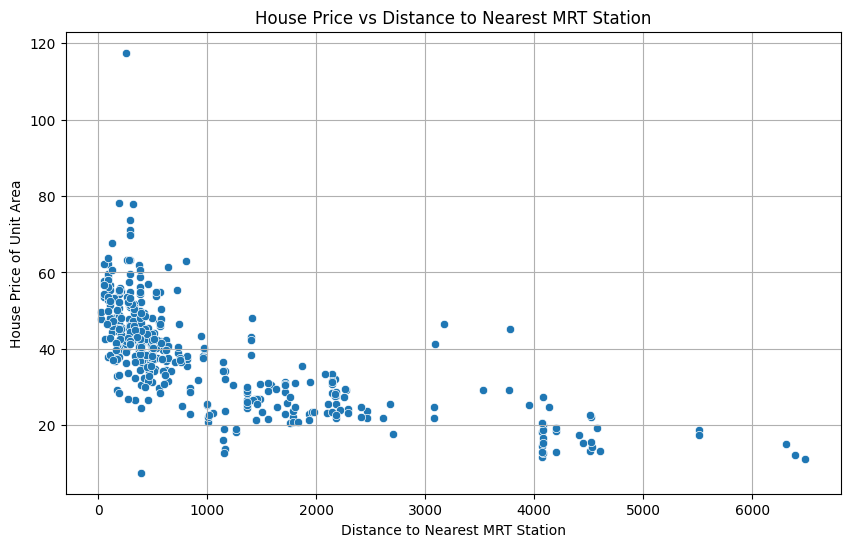

The findings on this plot:
* Check if there is a visible trend between the distance to the nearest MRT station and the house price of unit area.
* Assess how strongly the distance to the nearest MRT station correlates with the house price of unit area.
* Identify any outliers that might exist in the data.
* Look for any patterns or clusters that might suggest subgroups within the data.
* Derive insights regarding how the proximity to an MRT station affects house prices in the area.


In [165]:
# Scatter plot: House price vs Distance to the nearest MRT station
real_estate_df = pd.read_csv("Real Estate.csv")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=real_estate_df, x='X3 distance to the nearest MRT station', y='Y house price of unit area')
plt.title('House Price vs Distance to Nearest MRT Station')
plt.xlabel('Distance to Nearest MRT Station')
plt.ylabel('House Price of Unit Area')
plt.grid(True)
plt.show()


print("The findings on this plot:")
print("* Check if there is a visible trend between the distance to the nearest MRT station and the house price of unit area.")
print("* Assess how strongly the distance to the nearest MRT station correlates with the house price of unit area.")
print("* Identify any outliers that might exist in the data.")
print("* Look for any patterns or clusters that might suggest subgroups within the data.")
print("* Derive insights regarding how the proximity to an MRT station affects house prices in the area.")

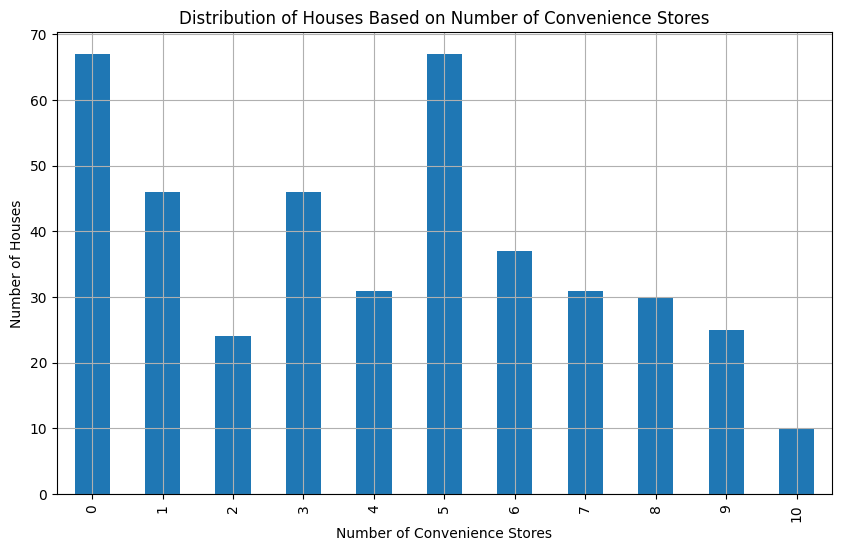

The findings from this plot:
* The bar plot shows how many houses fall into each category of the number of convenience stores nearby.
* It reveals whether a particular number of convenience stores is more common or rare in the dataset.
* The areas with a higher density of convenience stores might indicate more urban or commercial zones.
* Look for any patterns in house distribution based on the number of convenience stores, which could indicate preferences or trends in the real estate market.


In [166]:
# Bar chart: Distribution of houses based on the number of convenience stores

plt.figure(figsize=(10, 6))
real_estate_df['X4 number of convenience stores'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Houses Based on Number of Convenience Stores')
plt.xlabel('Number of Convenience Stores')
plt.ylabel('Number of Houses')
plt.grid(True)
plt.show()

print("The findings from this plot:")
print("* The bar plot shows how many houses fall into each category of the number of convenience stores nearby.")
print("* It reveals whether a particular number of convenience stores is more common or rare in the dataset.")
print("* The areas with a higher density of convenience stores might indicate more urban or commercial zones.")
print("* Look for any patterns in house distribution based on the number of convenience stores, which could indicate preferences or trends in the real estate market.")